In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


### Drop Out X
> CNN convolution 

In [3]:
# INPUT_SIZE = 28

# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
# ┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
# ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
# │ input_layer_12 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ conv2d_22 (Conv2D)                   │ (None, 28, 28, 64)          │           640   │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ conv2d_23 (Conv2D)                   │ (None, 26, 26, 128)         │         73856   │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 128)         │             0   │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ flatten_9 (Flatten)                  │ (None, 10816)               │              0  │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ dense_18 (Dense)                     │ (None, 64)                  │    1,384,512    │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ dense_19 (Dense)                     │ (None, 10)                  │            650  │
# └──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

# Total params: 1,459,658 (5.57 MB)
#  Trainable params: 1,459,658 (5.57 MB)
#  Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model() :
# 입력층 선언 
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
    
    # 첫 번째 Conv2D 층 (convolution 작업 층)
    conv2d_22 = Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu')(input_tensor)
    
    # 두 번째 Conv2D 층 (여기서는 feature map을 축소 시킨다. filter 개수는 128로 늘림)
    conv2d_23 = Conv2D(filters=128, kernel_size=3, strides=1, activation='relu')(conv2d_22)
    
    # 세 번째 Conv2D 층 (여기서는 Max Pooling 으로 pooling size를 2로 줘서 feature map을 다시 축소시키고, filter 개수는 유지)
    max_pooling2d_11 = MaxPooling2D(2)(conv2d_23)

    # 네 번째 Conv2D 층 ()
    conv2d_24 = Conv2D(filters=64, kernel_size=3, strides=2, activation='relu', padding="same")(max_pooling2d_11)
    
    # Flatten 층 
    flatten_9 = Flatten()(max_pooling2d_11)
    
    # 첫번째 Dense 층 -> neuron 64로 설정
    dense_18 = Dense(64, activation='relu')(flatten_9)
    
    # 두 번째 Dense 층 (출력층)
    
    dense_19 = Dense(10, activation='softmax')(dense_18)
    
    model = Model(inputs=input_tensor, outputs=dense_19)
    
    return model






In [6]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 4C09-A5C6

 C:\python\workspace\kdt_0900_jsh\ai\deep_learning\d_cnn 디렉터리

2024-05-28  오후 05:27    <DIR>          .
2024-05-28  오전 11:30    <DIR>          ..
2024-05-28  오후 04:09    <DIR>          .ipynb_checkpoints
2024-05-28  오후 05:01           145,491 a_cnn.ipynb
2024-05-28  오후 05:27           128,183 a_cnn_task01.ipynb
2024-05-28  오후 05:16    <DIR>          callback_files
2024-05-28  오전 11:30    <DIR>          datasets
2024-05-28  오후 02:43    <DIR>          images
               2개 파일             273,674 바이트
               6개 디렉터리  370,055,692,288 바이트 남음


In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1, # 학습률을 감소 시킬 비율 
    patience=2, # 학습률을 줄이기 전에 monitor 할 반복 횟수
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

history = model.fit(x=train_images, y=train_oh_targets, validation_data=(validation_images, validation_oh_targets),
                   batch_size=64, epochs=20, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 65ms/step - acc: 0.9051 - loss: 0.3087 - val_acc: 0.9822 - val_loss: 0.0554 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - acc: 0.9873 - loss: 0.0422 - val_acc: 0.9874 - val_loss: 0.0409 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 67ms/step - acc: 0.9922 - loss: 0.0229 - val_acc: 0.9876 - val_loss: 0.0403 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - acc: 0.9957 - loss: 0.0136 - val_acc: 0.9882 - val_loss: 0.0416 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 67ms/step - acc: 0.9967 - loss: 0.0101 - val_acc: 0.9887 - val_loss: 0.0408 - learning_rate: 0.0010
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 67ms/step - acc: 0.9982 - loss: 0.0057 - val_acc: 0.9905 - val_loss: 0.0362 - learning_rate: 1.0000e-04
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 74ms/step - acc: 0.9997 - loss: 0.0019 - val_acc: 0.9912 - val_loss: 0.0367 - learning_r

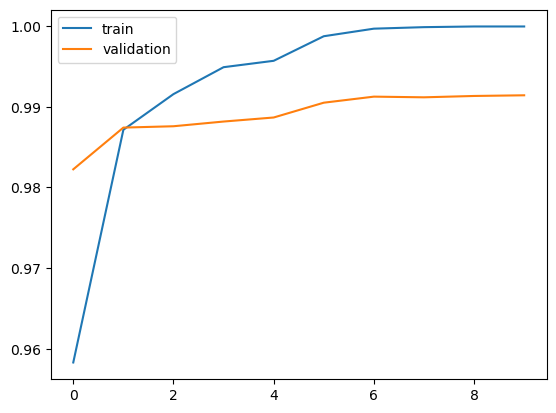

In [8]:
import matplotlib.pyplot as plt

def show_history(history) : 
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    # plt.ylim(0.8, 1.3)
    plt.legend()
    plt.show()

show_history(history)

In [9]:
model = create_model()
model.load_weights('./callback_files/weights.009-0.0415-0.9999.weights.h5')

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy() , metrics=['acc'])
model.evaluate(test_images, test_oh_targets)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9885 - loss: 0.0412


[0.03174479678273201, 0.9911999702453613]

In [10]:
pred_proba = model.predict(np.expand_dims(test_images[3000], axis=0))
print(pred_proba)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[6.0901497e-12 4.3620887e-17 1.0762160e-13 7.5073186e-12 6.5467976e-13
  1.3265133e-05 9.9998665e-01 9.7236613e-20 1.1481626e-07 4.5160108e-12]]


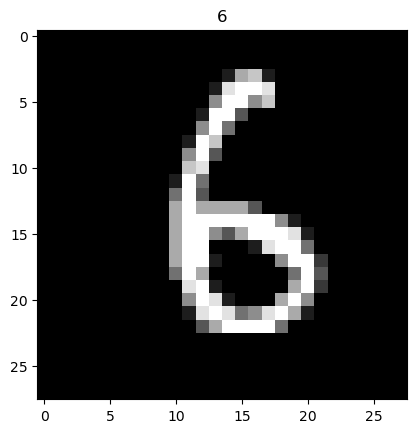

In [11]:
import matplotlib.pyplot as plt

class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']


plt.imshow(test_images[3000], cmap='gray')
plt.title(class_names[pred_proba.flatten().argsort()[::-1][0]])
plt.show()

#### Drop out를 사용하지 않아도 과적합 문제가 발생하지않고, 매우 좋은 성능을 보인다.

### Drop Out 적용

In [12]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    # input 입력층 -> 여기서 1은 채널의 개수를 의미한다.
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
    conv2d_22 = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
    conv2d_23 = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(conv2d_22)
    max_pooling = MaxPooling2D(2)(conv2d_23)
    flatten = Flatten()(max_pooling)

    drop_out = Dropout(rate=0.5)(flatten)

    dense_1 = Dense(32, activation='relu')(drop_out)
    dense_2 = Dense(64, activation='relu')(dense_1)
    dense_3 = Dense(10, activation='softmax')(dense_2)
    
    model = Model(inputs=input_tensor, outputs=dense_3)

    return model


In [13]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

INPUT_SIZE = 28

# input 
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
conv2d_22 = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
conv2d_23 = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(conv2d_22)
max_pooling = MaxPooling2D(2)(conv2d_23)
flatten = Flatten()(max_pooling)

drop_out = Dropout(rate=0.5)(flatten)

dense_1 = Dense(32, activation='relu')(drop_out)
dense_2 = Dense(64, activation='relu')(dense_1)
dense_3 = Dense(10, activation='softmax')(dense_2)    
model = Model(inputs=input_tensor, outputs=dense_2)


model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │         401,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,368 (1.61 MB)

 Trainable params: 422,368 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1, # 학습률을 감소 시킬 비율 
    patience=2, # 학습률을 줄이기 전에 monitor 할 반복 횟수
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

history = model.fit(x=train_images, y=train_oh_targets, validation_data=(validation_images, validation_oh_targets),
                   batch_size=64, epochs=20, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - acc: 0.8435 - loss: 0.4835 - val_acc: 0.9761 - val_loss: 0.0784 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - acc: 0.9757 - loss: 0.0759 - val_acc: 0.9800 - val_loss: 0.0652 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - acc: 0.9813 - loss: 0.0589 - val_acc: 0.9847 - val_loss: 0.0474 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - acc: 0.9848 - loss: 0.0470 - val_acc: 0.9863 - val_loss: 0.0491 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - acc: 0.9876 - loss: 0.0361 - val_acc: 0.9871 - val_loss: 0.0463 - learning_rate: 0.0010
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - acc: 0.9904 - loss: 0.0302 - val_acc: 0.9871 - val_loss: 0.0468 - learning_rate: 0.0010
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - acc: 0.9907 - loss: 0.0275 - val_acc: 0.9883 - val_loss: 0.0401 - learning_rate:


KeyboardInterrupt



In [15]:
model = create_model()
model.load_weights('./callback_files/weights.012-0.0348-0.9975.weights.h5')

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

# evaluate 함수를 사용하면 모델의 최종적인 정답률과 loss 값을 알 수 있다.

# loss는 예측값과 실제값이 차이나는 정도를 나타내는 지표이다. 

# 작을 수록 좋다.
model.evaluate(test_images, test_oh_targets)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9897 - loss: 0.0365


[0.029045065864920616, 0.9921000003814697]

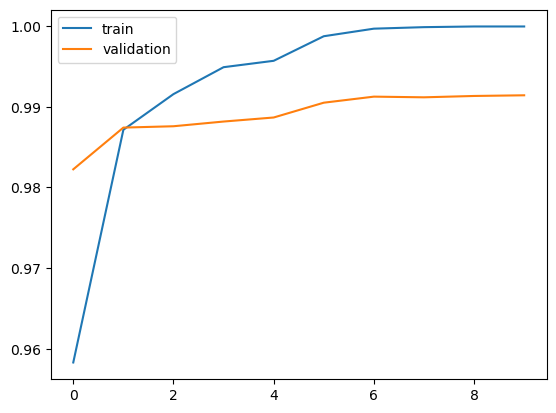

In [16]:
import matplotlib.pyplot as plt

def show_history(history) : 
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    # plt.ylim(0.5, 1.5)
    plt.legend()
    plt.show()

show_history(history)

In [17]:
pred_prob = model.predict(np.expand_dims(test_images[7000], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[1.9987070e-08 9.9999952e-01 8.2241067e-09 2.1185614e-12 1.3835944e-07
  2.1030442e-09 5.3960040e-08 9.5361834e-09 2.0057517e-07 8.5053858e-10]]


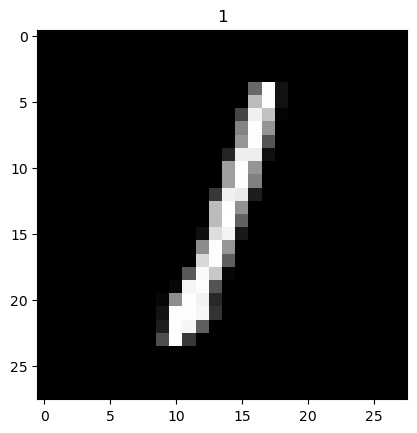

In [18]:
import matplotlib.pyplot as plt

class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']


plt.imshow(test_images[7000], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

#### Drop-Out를 실행하고 실제 dropout 비율을 50%로 주었더니 과적합 발생 가능성이 매우 낮아졌다!!